# Heterogeneity in Returns to Schooling

According to the paper by Koop and Tobias (2004):

Time Varying
- PERSONID = Person id (ranging from 1 to 2,178),
- EDUC = Education,
- LOGWAGE = Log of hourly wage,
- POTEXPER = Potential experience,
- TIMETRND = Time trend.

Time Invariant
- ABILITY = Ability,
- MOTHERED = Mother's education,
- FATHERED = Father's education,
- BRKNHOME = Dummy variable for residence in a broken home,
- SIBLINGS = Number of siblings.

Using the link, download the data used in Koop and Tobias's (2004) study of the relationship between wages and education, ability, and family characteristics. Their data set is a panel of 2,178 individuals with a total of 17,919 observations. Extract the first observations for the first 15 individuals in the sample.

In [1]:
clear all
import delimited Koop-Tobias.csv

egen first_obs = min(timetrnd), by(personid)
list personid educ logwage potexper timetrnd ability mothered fathered brknhome siblings if first_obs == timetrnd in 1/100



(10 vars, 17,919 obs)



     +-------------------------------------------------------------------------------------------------------+
     | personid   educ   logwage   potexper   timetrnd   ability   mothered   fathered   brknhome   siblings |
     |-------------------------------------------------------------------------------------------------------|
  1. |        1     13      1.82          1          0         1         12         12          0          1 |
  5. |        2     15      2.14          4          6       1.5         12         12          0          1 |
 14. |        3     10      1.56          1          2      -.36         12         12          1          1 |
 15. |        4     12      1.85          1          3       .26         12         10          1          4 |
 27. |        5     15      2.41          2          3        .3         12         12          1          1 |
     |-------------------------------------------------------------------------------

Let $X1$ equal a constant, education, experience, and ability (the individual's own characteristics). Let $X2$ contain the mother's education, the father's education, and the number of siblings (the household characteristics). Let $y$ be the log wage. 


In [2]:
global x1 educ potexper ability
global x2 mothered fathered siblings
global y logwage

a. Compute the least squares regression coefficients in the regression of **y **on X1. Report and interpret the coefficients.

In [3]:
regress $y $x1


      Source |       SS           df       MS      Number of obs   =    17,919
-------------+----------------------------------   F(3, 17915)     =   1252.94
       Model |  867.088558         3  289.029519   Prob > F        =    0.0000
    Residual |  4132.63745    17,915  .230680293   R-squared       =    0.1734
-------------+----------------------------------   Adj R-squared   =    0.1733
       Total |  4999.72601    17,918  .279033709   Root MSE        =    .48029

------------------------------------------------------------------------------
     logwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0737621   .0022143    33.31   0.000     .0694219    .0781022
    potexper |   .0394896   .0008984    43.96   0.000     .0377287    .0412504
     ability |   .0828907      .0046    18.02   0.000     .0738744    .0919071
       _cons |   1.027229   .0300415    34.19   0.

Education, potential experience, and ability are all significant predictors of logwage. By making the appropriate adjustments:
$$ \ln(WAGE) = \beta_0 + \beta_1 EDUC + \beta_2 POTEXP + \beta_3 ABILITY + e$$
$$ \Rightarrow WAGE = e^{\beta_0}\times e^{beta_1 EDUC} \times e^{beta_2 POTEXP} \times e^{\beta_3 ABILITY} $$

We can see that each additional year of education leads to a $e^{\beta_1} -1 = 1.07655066 -1 \approx 7.65\%$ increase in WAGE, each additional POTEXP leads to a $e^{\beta_2} -1 = 1.04027968 -1 \approx 4\%$ increase, and each additional point in Ability leads to a $e^{\beta_3} -1 = 1.08642306-1 \approx 8.6 \%$ increase.

We furthermore see that the R-squared is $17\%$, which is the proportion of the variance in $y$ attributable to the variance in $X1$. 

b. Compute the least squares regression coefficients in the regression of $y$ on $X_1$ and $X_2$. Report and interpret the coefficients.


In [4]:
regress $y $x1 $x2


      Source |       SS           df       MS      Number of obs   =    17,919
-------------+----------------------------------   F(6, 17912)     =    632.02
       Model |  873.550652         6  145.591775   Prob > F        =    0.0000
    Residual |  4126.17535    17,912   .23035816   R-squared       =    0.1747
-------------+----------------------------------   Adj R-squared   =    0.1744
       Total |  4999.72601    17,918  .279033709   Root MSE        =    .47996

------------------------------------------------------------------------------
     logwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0722035   .0022508    32.08   0.000     .0677918    .0766152
    potexper |   .0395093   .0008993    43.94   0.000     .0377467    .0412719
     ability |   .0774678   .0049373    15.69   0.000     .0677903    .0871453
    mothered |   -.000117   .0016963    -0.07   0.

In [5]:
regress $y $x1 $x2, noconstant


      Source |       SS           df       MS      Number of obs   =    17,919
-------------+----------------------------------   F(6, 17913)     =  65849.52
       Model |  95212.5862         6  15868.7644   Prob > F        =    0.0000
    Residual |  4316.76885    17,913  .240985254   R-squared       =    0.9566
-------------+----------------------------------   Adj R-squared   =    0.9566
       Total |  99529.3551    17,919  5.55440343   Root MSE        =     .4909

------------------------------------------------------------------------------
     logwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .1238229   .0013894    89.12   0.000     .1210995    .1265463
    potexper |   .0478474   .0008707    54.95   0.000     .0461408    .0495539
     ability |   .0133685   .0045062     2.97   0.003     .0045359    .0222012
    mothered |   .0145872   .0016544     8.82   0.

In the additional mode, the inclusion of the extra variables within $X2$ showed minimal improvement in the adjusted $R^2$. The coefficient estimates of EDUC, POTEXP, ability and the intercept were pretty much the same. The mother's education was not a statistically significant predictor, while the education of the father and the siblings were statistically significant, but the effects were very small. 

c. Compute the R-squared for the the regression of **y** on X1 and X2 manually using the SSE and SST from the output. Repeat the computation for the case in which the constant term is omitted. You need use the **noconstant **option, which suppresses the constant in a regression model. What happens to R-squared?

With the constant term, we have:
$$ R^2 = 1- \frac{SSE}{SST} = 1 - \frac{4126.17535}{4999.72601} = 0.17471$$
Without the constant term, we have
$$ R_0^2 = 1- \frac{SSE}{SST} = 1 - \frac{4316.76885}{99529.3551} = 0.95662$$

$R^2$ is higher when the intercept is suppressed.

d. Compute the adjusted R-squared for the full regression with and without the constant term. Interpret your results. Do we need the constant term? (Hint: Make sure to refer to the economic theory to discuss whether one should have the constant term regardless of statistical significance)

$$ \bar{R}^2 = 1 - (1 - R^2)\Big[ \frac{n-1}{n-(k+1)}\Big] = 1 - (1-0.17471) \Big[ \frac{17919-1}{17919 - (6 + 1)} \Big] = 0.17443$$
$$ \bar{R}_0^2 = 1 - (1 - R_0^2)\Big[ \frac{n-1}{n-(k+1)}\Big] = 1 - (1- 0.95662) \Big[ \frac{17919-1}{17919 - (6 + 1)} \Big] = 0.95660$$

Yes, we need the constant term. Something is clearly wrong here in the second part. Clearly, the variation in $X1, X2$ is not responsible for $95\%$ of the variation in $y$. Generally, the removal of variables reduces $R^2$, instead of increases it. The problem here is the way $R^2$ is calculated on the back end. See further here. https://stats.stackexchange.com/questions/26176/removal-of-statistically-significant-intercept-term-increases-r2-in-linear-mo


(#specification)



e. Are any of the classical assumptions violated in part a or part b? Refer to the assumptions MR1, MR2, MR5, and MR6.

MR1: Linear relatinoship

MR2: Errors have an expected value of 0.

MR5: Lack of multicollinearity

MR6: Assuming that the values of $y$ are normally distributed about the mean, $y \sim N[(\beta_1 + \beta_2 x_2 + \beta_3 x_3), \sigma^2] \iff e \sim N(0, \sigma^2)$


#economictrictheory


In [20]:
// MR1, specification (omitted variable) bias

qui reg $y $x1
predict res1, resid
estat ovtest

qui reg $y $x1 $x2
predict res2, resid
estat ovtest





Ramsey RESET test using powers of the fitted values of logwage
       Ho:  model has no omitted variables
               F(3, 17912) =      3.32
                  Prob > F =      0.0190




Ramsey RESET test using powers of the fitted values of logwage
       Ho:  model has no omitted variables
               F(3, 17909) =      4.20
                  Prob > F =      0.0056



(bin=42, start=-2.5289071, width=.11108324)


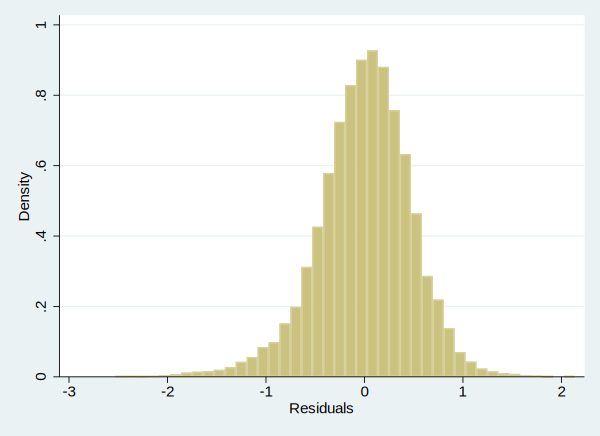




(bin=42, start=-2.515588, width=.11091744)


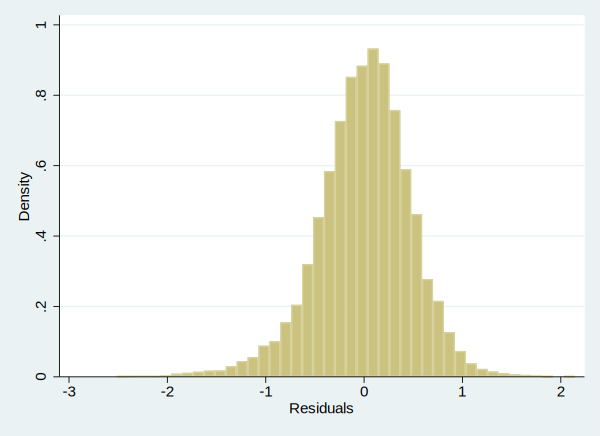

In [21]:
hist res1
hist res2

In [24]:
ttest res1 == 0
ttest res2 == 0



One-sample t test
------------------------------------------------------------------------------
Variable |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
    res1 |  17,919    1.07e-10    .0035877    .4802517   -.0070322    .0070322
------------------------------------------------------------------------------
    mean = mean(res1)                                             t =   0.0000
Ho: mean = 0                                     degrees of freedom =    17918

    Ha: mean < 0                 Ha: mean != 0                 Ha: mean > 0
 Pr(T < t) = 0.5000         Pr(|T| > |t|) = 1.0000          Pr(T > t) = 0.5000


One-sample t test
------------------------------------------------------------------------------
Variable |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
    res2 |  17

In [24]:
// MR2, exogeneity

qui reg $y $x1
predict res1, resid
reg $y $x1 res1
test res1



qui reg $y $x1 $x2
predict res2, resid
qui reg $y $x1 $x2 res2
test res2





      Source |       SS           df       MS      Number of obs   =    17,919
-------------+----------------------------------   F(4, 17914)     =         .
       Model |  4999.72601         4   1249.9315   Prob > F        =         .
    Residual |           0    17,914           0   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =    1.0000
       Total |  4999.72601    17,918  .279033709   Root MSE        =         0

------------------------------------------------------------------------------
     logwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0737621          .        .       .            .           .
    potexper |   .0394896          .        .       .            .           .
     ability |   .0828907          .        .       .            .           .
        res1 |          1          .        .  

In [25]:
// MR5, collinearity

corr $x1
qui reg logwage educ potexper ability
estat vif

corr $x1 $x2
qui reg logwage educ potexper ability mothered fathered siblings
estat vif


(obs=17,919)

             |     educ potexper  ability
-------------+---------------------------
        educ |   1.0000
    potexper |  -0.2187   1.0000
     ability |   0.5279  -0.2222   1.0000




    Variable |       VIF       1/VIF  
-------------+----------------------
     ability |      1.41    0.709365
        educ |      1.41    0.710501
    potexper |      1.07    0.936384
-------------+----------------------
    Mean VIF |      1.30

(obs=17,919)

             |     educ potexper  ability mothered fathered siblings
-------------+------------------------------------------------------
        educ |   1.0000
    potexper |  -0.2187   1.0000
     ability |   0.5279  -0.2222   1.0000
    mothered |   0.3478  -0.1403   0.4501   1.0000
    fathered |   0.3736  -0.1472   0.4492   0.6785   1.0000
    siblings |  -0.1873   0.1113  -0.2427  -0.3019  -0.2555   1.0000




    Variable |       VIF       1/VIF  
-------------+----------------------
    mothered |      2.00    0.500127


In [ ]:

// MR6, normality of residuals
qui reg $y $x1
predict residuals1, resid
hist residuals1, normal

summarize residuals1, detail


qui reg $y $x1 $x2
predict residuals2, resid
hist residuals2, normal


summarize residuals2, detail